# Questão 1

In [2]:
# Função da vídeo aula do Abel
"""
    (x, fx, exitflag) = newton(f, x)
"""
function newton(f, fd, x;
                atol = 1e-8, rtol = 1e-8,
                max_tempo = 10.0, max_iter = 1000,
                )
    fx = f(x)
    ϵ = atol + rtol * abs(fx)
    iter = 0
    t0 = time()
    Δt = time() - t0
    
    exitflag = :desconhecido
    resolvido = (abs(fx) ≤ ϵ)
    cansado   = (iter ≥ max_iter || Δt ≥ max_tempo)
    
    while !(resolvido || cansado)
        fdx = fd(x)
        if abs(fdx) ≤ ϵ
            exitflag = :derivada_nula
            break
        end
        x = x - fx / fdx
        fx = f(x)
        #println(x, ' ', fx)
        
        iter += 1
        Δt = time() - t0
        resolvido = (abs(fx) ≤ ϵ)
        cansado   = (iter ≥ max_iter || Δt ≥ max_tempo)
    end
    
    if resolvido
        exitflag = :sucesso
    elseif cansado
        if iter ≥ max_iter
            exitflag = :max_iter
        else
            exitflag = :max_tempo
        end
    end
    
    println("num de iterações: ", iter)
    
    return x, fx, exitflag
end

newton

### (a)

Para descobrirmos uma função que não ache nenhum zero no método de newton para qualquer x0 escolhido, apesar de ser contínua e possuir um, precisamos escolher uma função que ao se aproximar de zero vai se tornando menos "derivável", até chegar num ponto de não ser mais.

Uma função em que isso acontece é a $f\left(x\right)=\sqrt[3]{x}$ pois sua derivada $\frac{1}{3x^{\frac{2}{3}}}$ é indefinida quando $x = 0$

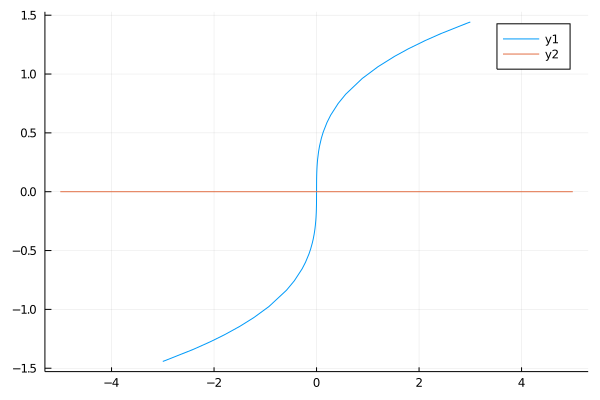

In [3]:
using Plots
f(x) = cbrt(x)
fd(x) = 1 / (3x^(2/3))
plot(f, -3, 3)
plot!(zero)

In [4]:
# Enquanto os valores vão se aproximando de 0, a derivada vai explodindo para infinito
for i=0.000000001:-0.0000000001:0.0000000001
    println(fd(i))
end

333333.333333333
357588.6609650478
386799.0694677313
422811.42940123804
468573.7029454159
529133.6839893993
614005.2497733972
743814.3889801877
974672.5794042877
1.5471962778709242e6


### (b)

Para encontrar uma função que atenda a oscilação entre dois valores, precisamos achar uma função em que $x_k = x_{k+2}$ e $x_{k+1} = x_{k+3}$, ou seja, a cada passagem de valor ele tem que voltar pro termo anterior, isso caracteriza a oscilação.

Podemos buscar valores que satisfazem essa confição a partir do teorema do método de Newton: $x_{k+1}=x_k-\frac{f\left(x_k\right)}{f\:'\left(x_k\right)}$

A função $f\left(x\right)=x^3-5x$ satisfaz essa condição porque ela é espelhada, então ao calcular um ponto escolhido no intervalo $\sqrt{-5}\:<\:x0\:<\sqrt{5}$ ele irá refletir no seu mesmo valor com o sinal trocado no próximo termo

In [5]:
f(x) = x^3 - 5x
fd(x) = 3x^2 - 5
newton(f, fd, 1)

num de iterações: 1000


(1.0, -4.0, :max_iter)

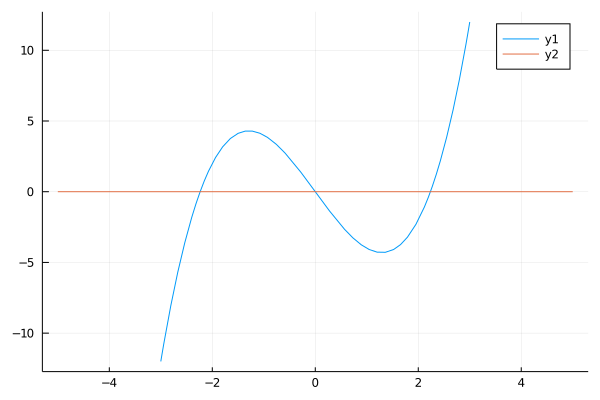

In [6]:
f(x) = x^3 - 5x
fd(x) = 3x^2 - 5
plot(f, -3.0, 3.0)
plot!(zero)

### (c)

para encontrarmos uma função que converge lentamente dado um x0 específico, basta encontrarmos um caso em que a fd(x0) jogue o próximo termo da função para muito longe

In [7]:
f(x) = ℯ^x - 1
fd(x) = ℯ^x
newton(f, fd, -6.0)

num de iterações: 402


(1.4206890746592641e-15, 1.3322676295501878e-15, :sucesso)

Podemos ver acima que com a função $f\left(x\right)=e^x-1$ com chute inicial $x0= -6.0$ leva 402 iterações para chegar num valor aceitável, isso para o método de Newton são muitos passos uma vez que o método deveria ser muito rápido.

**Abaixo está um exemplo do que está acontecendo graficamente**

┌ Info: Saved animation to 
│   fn = C:\Users\rodri\Desktop\CalcNum\exemplo.gif
└ @ Plots C:\Users\rodri\.julia\packages\Plots\lmp2A\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\rodri\\Desktop\\CalcNum\\exemplo.gif")
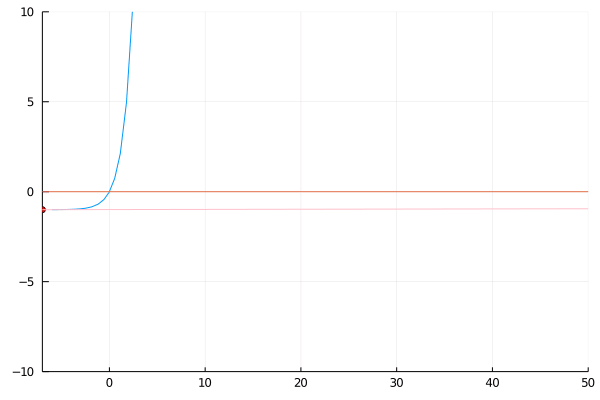

In [44]:
f(x) = ℯ^x - 1
fd(x) = ℯ^x
anim = Animation()
for x = -7.0:0.1:0.0
    plot(f, -6, 6, leg=false)
    plot!(zero, -7.0, 50.0)
    scatter!([x], [f(x)], c=:red, ms=4)
    local x
    for k=1:3
        xp = x - f(x) / fd(x)
        plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
        scatter!([xp], [f(xp)], c=:pink, ms=2)
        x = xp
    end
    
    xlims!(-7.0, 50.0)
    ylims!(-10.0,10.0)
    frame(anim)
end

gif(anim, "exemplo.gif", fps=10)

# Questão 2

### (a)

Primeiro precisamos igualar as funções pois se trata do ponto de interseção

$e^{\frac{x}{4}} = \frac{1.982}{x}$

Ao isolar o x, ficamos com:

$x = \frac{e^{\frac{x}{4}}}{1.982\:}$

In [46]:
f(x) = (1.982/ℯ^(x/4))

f (generic function with 1 method)

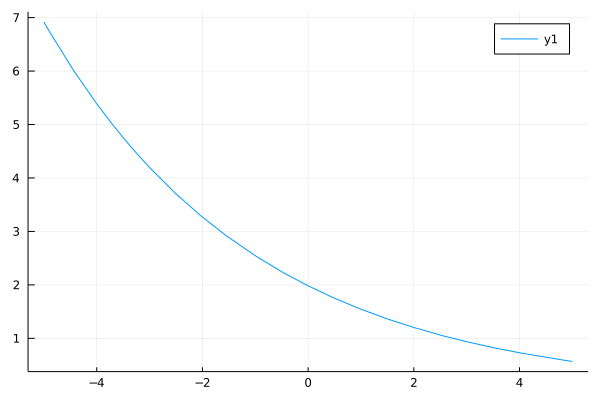

In [47]:
plot(f)

### (b)

Verdadeiro. Eles convergem para o valor 1.397548169234 como vemos abaixo

In [48]:
x = 0.0
y = 2.0
z = 1.0
for i = 1:30
    x = f(x)
    y = f(y)
    z = f(z)
    println(x, ' ', y, ' ', z)
end

1.982 1.2021437675504394 1.5435831520475245
1.2075656044881795 1.4675149998345143 1.3474455945662194
1.4655271905778686 1.3733152209107973 1.415163450671621
1.37399786269406 1.406040545816636 1.3914071500507537
1.405800610784544 1.3945841904143172 1.3996954096222947
1.3946678453238808 1.3985841288004526 1.3967981525921753
1.3985548794991065 1.3971862652521887 1.3978102398993748
1.39719648197007 1.3976746195163794 1.3974566081391195
1.397671049609119 1.3975039898424593 1.39758015986057
1.397505237082926 1.3975636050264875 1.3975369921685996
1.3975631692520847 1.3975427761788262 1.3975520743615812
1.3975429284321768 1.3975500534991698 1.397546804833994
1.3975500003037513 1.3975475108966238 1.3975486459380673
1.3975475294824051 1.3975483992488709 1.397548002680089
1.3975483927552388 1.39754808887009 1.3975482274260829
1.3975480911388811 1.3975481973124124 1.3975481489027437
1.397548196519726 1.3975481594240697 1.3975481763377806
1.3975481597010242 1.3975481726617658 1.3975481667523346
1.3

### (c)

In [49]:
x = 1.3
x_ant = 0

while(abs(x-x_ant) > 1e-2)
    x_ant = x
    x = f(x)
end

x

1.396081592479449

### (d)

In [50]:
fd(x) = -0.4955ℯ^(-x/4)

fd (generic function with 1 method)

In [52]:
newton(f, fd, 1.3, atol = 1e-2, rtol = 1e-2)

num de iterações: 3


(13.3, 0.07129753216929757, :derivada_nula)

A função $\frac{e^{\frac{x}{4}}}{1.982\:}$ diverge no método de Newton e por isso não é possível calcular uma aproximação

# Questão 3

O método de Newton encontra zero de funções progressivamente, e para aproximarmos $\sqrt[3]{43}$ precisamos fazer uma função cujo  zero dela seja $\sqrt[3]{43}$ pois iremos progressivamente nos aproximar deste valor

Uma função simples que satisfará nossa condição é $\left(x-\sqrt[3]{43}\right)^{2}$ pois quando $x=\sqrt[3]{43}\$ a função é zero

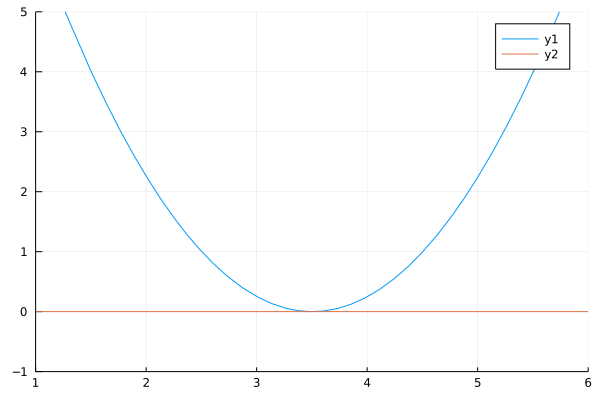

In [16]:
f(x) = (x - cbrt(43))^2
fd(x) = 2 * (x - cbrt(43))
plot(f, 1.0, 6.0)
xlims!(1.0, 6.0)
ylims!(-1.0, 5.0)
plot!(zero, 1.0, 6.0)

In [17]:
# chutando o valor inicial igual à 3
a, b, c = newton(f, fd, 3.0)

num de iterações: 13


(3.503336610428181, 3.776097404985888e-9, :sucesso)

In [18]:
abs(a - cbrt(43))

6.144995854340252e-5

# Questão 4

Como mostrado na imagem abaixo, partindo do teorema do método de Newton $x_{k+1}=x_k-\frac{f\left(x_k\right)}{f\:'\left(x_k\right)}$ substituindo com os valores alternados 1,2 chegamos em duas equações que nos dão as condições para a alternância acontecer, escolhemos um valor arbitrário e substituimos na nossa equação quadrática genérica.

![image.png](https://i.ibb.co/3R03xH2/quest-o4.jpg)

In [19]:
f(x) = x^2 - 3x + 3
fd(x) = 2x - 3
newton(f, fd, 1.0)

num de iterações: 1000


(1.0, 1.0, :max_iter)

Como esperado o algoritmo nunca vai sair da alternância e só para no número máximo de iterações